In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/home/sagarika/belgrade/agn/mass-agn-main/HW3/shen_subsample_500.csv') #given data set of 500 QSOs
df1=pd.read_csv('/home/sagarika/belgrade/agn/mass-agn-main/HW3/crossid.csv')           #Crossmatched data from SDSS

In [3]:
df             
# W_BHb_ is the FWHM of broad Hβ
# EWBHb is the Restframe equivalent width of broad Hb
# Absolute i-band magnitude (normalized at z=2), K-corrected following 
# Richards et al. (2006, Cat. J/AJ/131/2766) (phys.magAbs)

,plate,mjd,fiberid,RAJ2000,DEJ2000,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,W_BHb_,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd
0,294,51986,299,195.60806,-1.08644,-22.84,45.250,0.004,41.85,0.07,7229.1,2223.1,18.5,3.5,20.12,8.77,0.27,-1.62
1,294,51986,260,195.89711,-0.82022,-22.57,45.050,0.006,42.18,0.04,7081.5,352.0,61.5,6.0,17.75,8.65,0.04,-1.70
2,294,51986,194,196.80522,-0.60046,-22.82,44.973,0.005,42.30,0.03,2350.9,189.0,95.5,6.1,19.90,7.66,0.07,-0.78
3,294,51986,528,196.98573,1.11934,-24.18,45.672,0.002,43.01,0.02,4799.4,489.0,98.2,4.9,35.73,8.62,0.09,-1.05
4,298,51955,577,203.71016,1.03857,-22.73,45.147,0.004,41.61,0.07,2132.9,884.1,13.6,2.1,17.70,7.66,0.36,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2789,54555,231,220.06677,20.35394,-22.36,44.948,0.004,42.11,0.02,5923.8,248.2,64.5,3.0,17.00,8.45,0.04,-1.60
496,2791,54556,520,224.66841,19.87184,-23.13,45.124,0.017,42.39,0.04,2310.5,491.6,81.2,7.7,21.06,7.72,0.18,-0.69
497,2792,54556,89,227.30748,17.95278,-23.39,45.357,0.002,42.49,0.02,2330.9,40.9,61.5,3.0,31.31,7.84,0.02,-0.58
498,2947,54533,473,220.11891,63.51298,-22.90,45.109,0.004,42.20,0.02,8071.8,309.5,55.7,2.8,23.05,8.80,0.03,-1.79


In [4]:
df1     

#h_beta_flux in units of 10-17 ergs/cm2/s

,plate,mjd,fiberid,h_beta_flux,z
0,1289,52734,184,874.7607,0.231337
1,2014,53460,440,574.8809,0.247361
2,2120,53852,59,854.1714,0.187615
3,2131,53819,15,420.1388,0.145362
4,2009,53904,70,171.1441,0.258802
...,...,...,...,...,...
495,1811,53533,122,1004.0020,0.230687
496,1704,53178,389,243.5901,0.199284
497,1774,53759,602,266.3202,0.231364
498,1776,53858,612,1311.8270,0.134188


In [5]:
df2 = pd.merge(df, df1, on=['plate', 'mjd', 'fiberid'])
df2     #merged data

,plate,mjd,fiberid,RAJ2000,DEJ2000,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,W_BHb_,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,h_beta_flux,z
0,294,51986,299,195.60806,-1.08644,-22.84,45.250,0.004,41.85,0.07,7229.1,2223.1,18.5,3.5,20.12,8.77,0.27,-1.62,66.01272,0.234611
1,294,51986,260,195.89711,-0.82022,-22.57,45.050,0.006,42.18,0.04,7081.5,352.0,61.5,6.0,17.75,8.65,0.04,-1.70,131.78020,0.207837
2,294,51986,194,196.80522,-0.60046,-22.82,44.973,0.005,42.30,0.03,2350.9,189.0,95.5,6.1,19.90,7.66,0.07,-0.78,1226.00900,0.170193
3,294,51986,528,196.98573,1.11934,-24.18,45.672,0.002,43.01,0.02,4799.4,489.0,98.2,4.9,35.73,8.62,0.09,-1.05,556.11180,0.275446
4,298,51955,577,203.71016,1.03857,-22.73,45.147,0.004,41.61,0.07,2132.9,884.1,13.6,2.1,17.70,7.66,0.36,-0.61,159.38830,0.245580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2789,54555,231,220.06677,20.35394,-22.36,44.948,0.004,42.11,0.02,5923.8,248.2,64.5,3.0,17.00,8.45,0.04,-1.60,155.79820,0.204802
496,2791,54556,520,224.66841,19.87184,-23.13,45.124,0.017,42.39,0.04,2310.5,491.6,81.2,7.7,21.06,7.72,0.18,-0.69,973.65030,0.222684
497,2792,54556,89,227.30748,17.95278,-23.39,45.357,0.002,42.49,0.02,2330.9,40.9,61.5,3.0,31.31,7.84,0.02,-0.58,1935.62300,0.170544
498,2947,54533,473,220.11891,63.51298,-22.90,45.109,0.004,42.20,0.02,8071.8,309.5,55.7,2.8,23.05,8.80,0.03,-1.79,54.41901,0.284733


Redshift gives a measure of how much the wavelegth ( light emitted by an object) has been shifted to longer wavelengths due to its motion relative to us. 
FWHM gives the width of spectral line. This tells us about the velocity and energy of the gas that emitted the line.
Plotting a redshift vs FWHM of Hβ can help us detect patters between the two.

Text(0.5, 1.0, 'Histogram of Redshift')

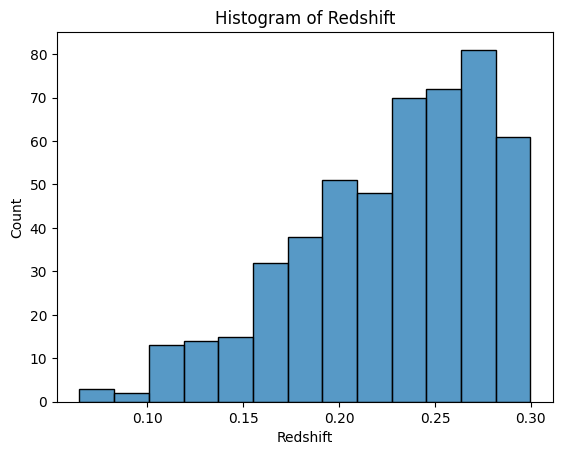

In [6]:
sns.histplot(df2['z'])
plt.xlabel("Redshift")
plt.title("Histogram of Redshift")

Text(0.5, 1.0, 'Plot of redshift vs FWHM of Hβ line')

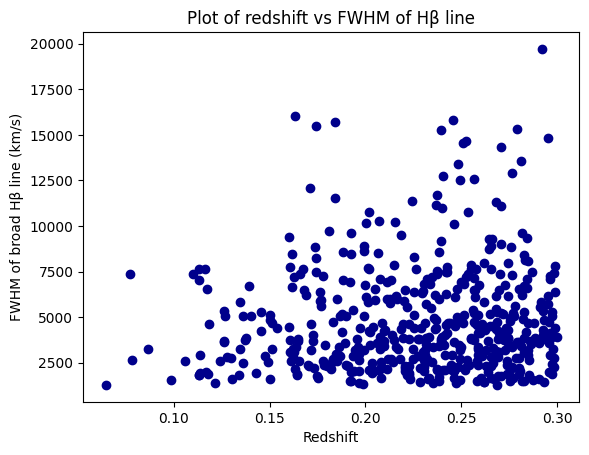

In [7]:
plt.scatter(df2['z'],df2['W_BHb_'],color ='darkblue')
plt.ylabel('FWHM of broad H\u03B2 line (km/s)')
plt.xlabel('Redshift')
plt.title("Plot of redshift vs FWHM of Hβ line")

Text(0.5, 1.0, 'Correlation between FWHM of Hβ line and redshift')

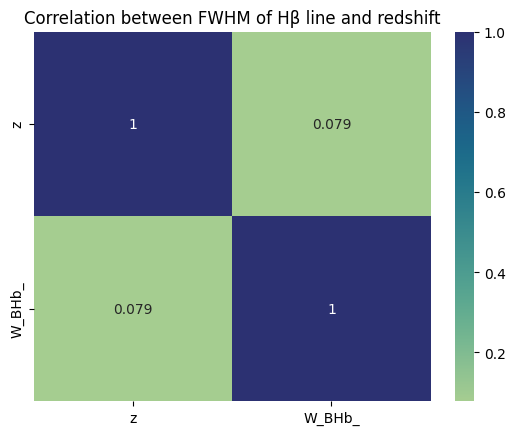

In [8]:
sns.heatmap(df2[['z','W_BHb_']].corr(),annot=True, cmap="crest") 
plt.title("Correlation between FWHM of Hβ line and redshift")

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

The diagonals are all 1 because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

So there seems to be a low positive correlation between redshift and FWHM of Hβ lines. We see that at higher redshifts the and lower FWHM, there is more clustering of data points. 
The limitation to this data set is that we cannot check FWHM values for lower and higher redshifts. 
We cannot understand if at lower redshifts the FWHM remains low or not. Similarly we cannot know if at redshifts > 0.3 the FWHN increases or stays low. 

Absolute i-band magnitude is a band in IR wavelength. 

Text(0.5, 1.0, 'Plot of Absolute i-band magnitude vs redshift')

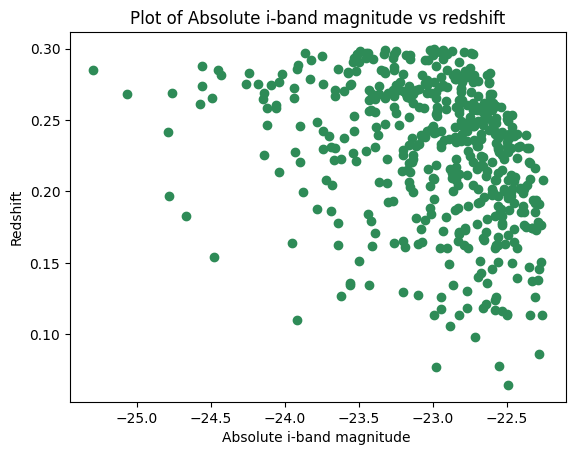

In [9]:
plt.scatter(df2['iMAG'],df2['z'], color ='seagreen')
plt.xlabel('Absolute i-band magnitude ')
plt.ylabel('Redshift')
plt.title("Plot of Absolute i-band magnitude vs redshift")

Text(0.5, 1.0, 'Correlation between absolute i-band magnitude and redshift ')

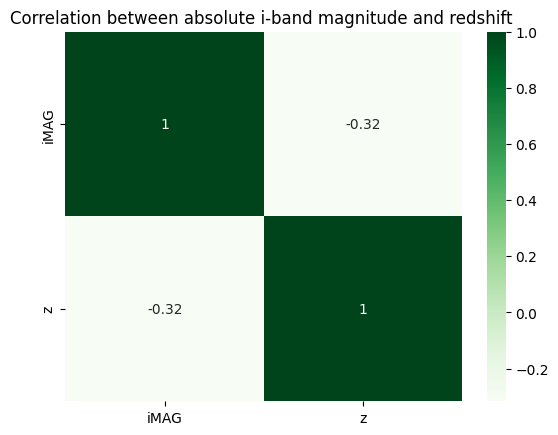

In [10]:
sns.heatmap(df2[['iMAG','z']].corr(),annot=True, cmap="Greens")
plt.title("Correlation between absolute i-band magnitude and redshift ")

Here we see a negative but not so small correlation between iMag and reshdift of the Quasers. 
Here we see more clustering of data points at higher redshifts but less nagative value of imag. 
So there are objects that are brighter in imag at higher redshifts. 
At lower redshifts we see there are less samples that are dimmer in the imag value. 
In this plot too we cannot see how the trend continues for different redshift ranges. 

# Calculation of Luminosity Distance

In [11]:
from astropy.cosmology import FlatLambdaCDM 
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
from astropy.units import imperial

In [12]:
z=df2['z']
L_D=cosmo.luminosity_distance(z)  # units of MPc where 1 MPC  = 3.0857 x 10^24 cm
L_D


0      1186.849383
1      1035.281031
2       828.758064
3      1425.197887
4      1250.030675
          ...     
495    1018.341522
496    1118.860362
497     830.647360
498    1480.578844
499     531.935293
Name: z, Length: 500, dtype: float64

In [13]:
#Making the quantity dimensionless to avoid calculation problems in the next steps
L_D=L_D/u.Mpc

Here I had to make the units dimensionless. Otherwise the units were creating various problems when being converted to centimeters. Even taking log of the values seemes difficult. 
Hence I have made the units dimensionless here.

# Luminosity of Hβ line

In [14]:
L_Hb = (4*np.pi*((L_D*3.0857e24)**2)*(df2['h_beta_flux']*1e-17) )/(1+df2['z'])

#L_D*3.0857e24 changes distance from MPc to cm and 10e-17 is mulltiplied to Hbeta flux 
#because it is given in those units in SDSS
# Using Equation 23 of Hogg (2000)

L_Hb        #Luminosity in ergs/s

0      9.011684e+40
1      1.399187e+41
2      8.610114e+41
3      1.059663e+42
4      2.392454e+41
           ...     
495    1.604542e+41
496    1.192773e+42
497    1.365160e+42
498    1.111010e+41
499    1.608207e+41
Length: 500, dtype: float64

In [15]:
log_LHbB=np.log10(L_Hb )
log_LHbB                 # log of luminosity in ergs/s 

0      40.954806
1      41.145876
2      41.935009
3      42.025168
4      41.378844
         ...    
495    41.205351
496    42.076558
497    42.135184
498    41.045718
499    41.206342
Length: 500, dtype: float64

# Calculate black hole mass 

M_bh = 2.4*10e6 * (LHb/10e42 ergs/s)**0.59 * (FWHM_HB/10e3 km/s)**2 * M_sun .

This equation is taken from Wu (2009) equation (2)

In [16]:
M_sun=1.989e33
lum_Hb = L_Hb/1e42
fwhm_Hb = df2['W_BHb_']/1e3

M_bh = 2.4e6*(lum_Hb**0.59)*(fwhm_Hb**2) #*M_sun # in terms of solar mass
log_M_bh = np.log10(M_bh)
log_M_bh

0      7.481715
1      7.576528
2      7.084335
3      7.757434
4      6.671670
         ...   
495    7.456569
496    7.152792
497    7.195017
498    7.631126
499    7.609464
Length: 500, dtype: float64

Here we use the FWHM of the Hβ and its luminosity to calculate the black hole mass. 
This is possible if we assume that the BLR is graviationally bound to the BH potential. If this is so then the orbital velocity and doppler velocity is affcetd by the BH potential and hence mass. 
So using these parameters we can calculate the mass of the BH. 

Citation: Woo, J. H., & Urry, C. M. (2002). Active galactic nucleus black hole masses and bolometric luminosities. The Astrophysical Journal, 579(2), 530-544. https://doi.org/10.1086/342070

We also assume the BH to have a disc-like geometry. Hβ lines are typically emission lines of hydrogen which are found in AD around BH. So unless a disc like geometry is assumed we cannot use this line. This also means that we assume the gas in the disk around the BH to be virialized. 

We also assume that the FWHM of the Hβ is proportional to the velocity dispersion of the disk gas. We assume that the broadening is due to the random thermal motion of the has. 

Text(0.5, 1.0, 'Histogram of $M_{bh}/M_{\\odot}$ mass')

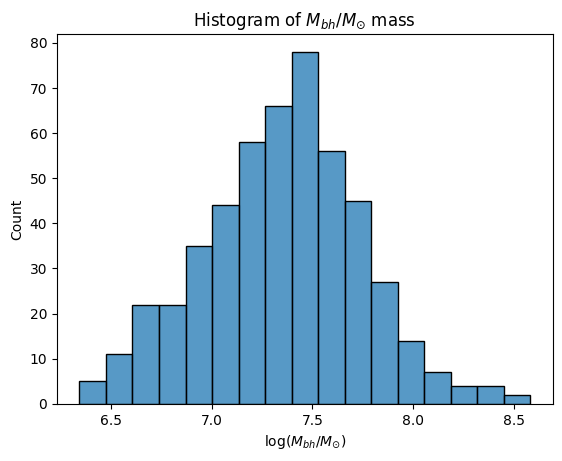

In [17]:
sns.histplot(data=log_M_bh)
plt.xlabel("log($M_{bh}/M_{\odot}$)")
plt.title("Histogram of $M_{bh}/M_{\odot}$ mass")

# Calculate bolometric luminosity

# L_bol=10*L_BLR=10 * 25.26* LHb

In [18]:
L_bol = 10*25.26*L_Hb  #Equation taken from page 6 of Wu (2009) with references Celotti et al.1997; Liu et al. 2006 
L_bol

0      2.276351e+43
1      3.534346e+43
2      2.174915e+44
3      2.676708e+44
4      6.043339e+43
           ...     
495    4.053073e+43
496    3.012945e+44
497    3.448395e+44
498    2.806412e+43
499    4.062331e+43
Length: 500, dtype: float64

# Calculate Eddington Luminosity
# L_Edd = (1.38e38*M_bh)/M_sum

In [19]:
l_edd = (1.38e38*M_bh) #The formula has M_bh/M_sun. However the mass of BH 
                       #I calculated is already in terms of solar masses and hence I did not have to 
                       #divide the solar mass again. Equation taken from Wu (2009) section 4.1 page 6
l_edd

0      4.184025e+45
1      5.204842e+45
2      1.675768e+45
3      7.894290e+45
4      6.479613e+44
           ...     
495    3.948646e+45
496    1.961875e+45
497    2.162200e+45
498    5.902076e+45
499    5.614914e+45
Length: 500, dtype: float64

# Eddington Ratio = L_bol/L_edd

In [20]:
edd_r = (L_bol)/l_edd 
edd_r                   #Eddington ratio

0      0.005441
1      0.006790
2      0.129786
3      0.033907
4      0.093267
         ...   
495    0.010264
496    0.153575
497    0.159485
498    0.004755
499    0.007235
Length: 500, dtype: float64

In [21]:
log_edd_r = np.log10(edd_r)
log_edd_r                 # log of eddington ratio

0     -2.264355
1     -2.168098
2     -0.886772
3     -1.469712
4     -1.030272
         ...   
495   -1.988664
496   -0.813680
497   -0.797279
498   -2.322853
499   -2.140568
Length: 500, dtype: float64

Text(0.5, 1.0, 'Histogram of log($E_{Edd}$)')

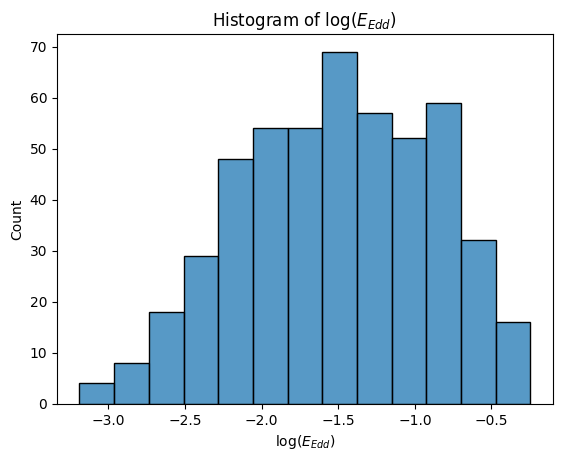

In [22]:
sns.histplot(data=log_edd_r)
plt.xlabel("log($E_{Edd}$)")
plt.title("Histogram of log($E_{Edd}$)")

Text(0.5, 1.0, 'Histogram of Eddington ratio')

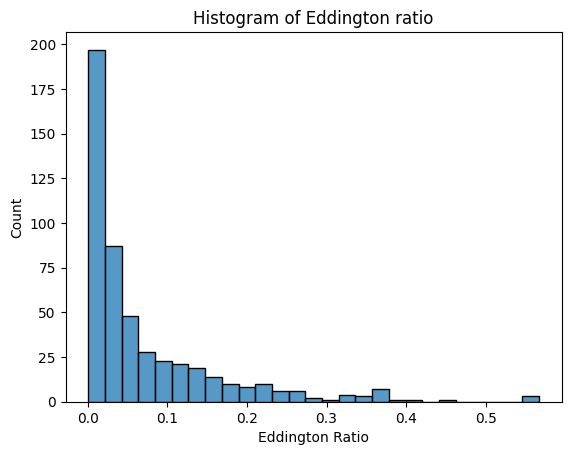

In [23]:
sns.histplot(data=edd_r)
plt.xlabel("Eddington Ratio")
plt.title("Histogram of Eddington ratio")

Text(0, 0.5, 'log $L_{bol}$')

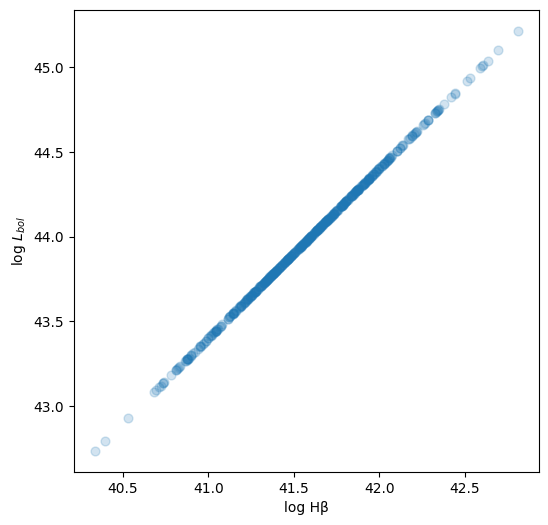

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(log_LHbB, np.log10(L_bol), alpha=0.2, s=40)
plt.xlabel("log Hβ")
plt.ylabel("log $L_{bol}$")

This graph show the correlations between the bolometric luminosities and broad line luminosities. As expected this is a pretty good positive correlation because the equation used to derive the bolometric luminosity from the Hβ line is a linear equation. 
This graph resembles the one in Figure 2 of Wu (2009) 

Text(0, 0.5, 'log $M_{bh}/M_{\\odot}$')

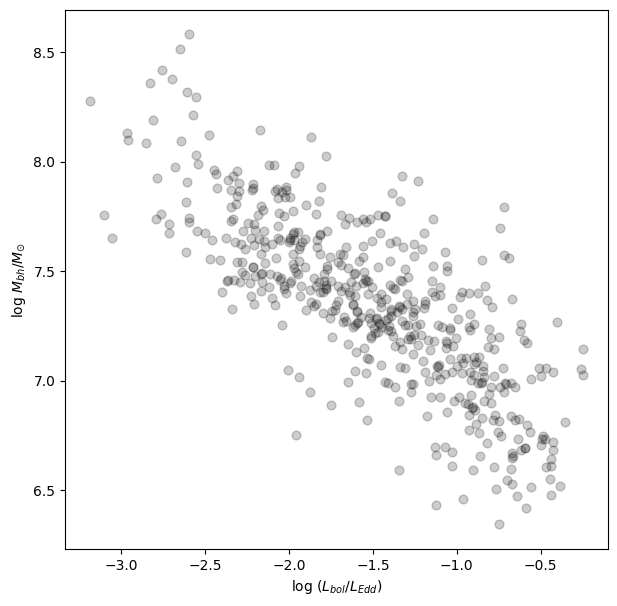

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(log_edd_r, np.log10(M_bh), alpha=0.2, s=40, color='black')
plt.xlabel("log ($L_{bol}/L_{Edd}$)")
plt.ylabel("log $M_{bh}/M_{\odot}$")


#https://iopscience.iop.org/article/10.3847/1538-4357/aabe2a/pdf 
#https://www.researchgate.net/figure/Eddington-ratio-vs-black-hole-mass-left-and-redshift-right-Symbols-indicate_fig5_230964558